In [4]:
import pandas as pd
import pandas


In [5]:
%matplotlib inline
from numpy import array, linspace ; from numpy.random import randint
from matplotlib.pyplot import hist, xticks, show
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
# synthesize some data 
font_size = 30
font = {
    'family' : 'serif',
    'weight':'normal',
        'size'   : font_size}


matplotlib.rc('font', **font)
plt.rcParams.update({
    "text.usetex": True,
})

# plt.rc('text', usetex=True)
import seaborn as sns
pallete = sns.color_palette("Set1", 4)
dgl_color = pallete[0]
quiver_color = pallete[1]
groot_color = pallete[2]
edge2color = {"GSplit": "tab:blue",
         "DistCache": "tab:purple"}
quiver_color = edge2color['DistCache']
groot_color = edge2color['GSplit']

hatches = list('-*/o')

pallete = sns.color_palette("Set1", 4)
pallete

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098)]

In [6]:


def plot_bar(ax,position, df, color, width):
    if len(df) != 1:
        print(df, df['hid_size'])
    sampling_time = df['sampling (s)'].item()
    if sampling_time != "oom":
        n_epochs = float(df['num_epoch'].item())
        sampling_time = float(sampling_time)
        data_loading = float(df['feature (s)'].item())
        training_time = (float(df['forward (s)'].item()) + float(df['backward (s)'].item()))
        
        ax.bar([position], [sampling_time], width, color = color, edgecolor = 'black', alpha = 0.7 )
        ax.bar([position], [data_loading], width, color = color, edgecolor = 'black', \
                bottom = [sampling_time], hatch = '//', alpha = 0.7)    
        ax.bar([position], [training_time], width, color = color, edgecolor = 'black', \
                bottom = [sampling_time + data_loading], hatch = '..', alpha = 0.7)    
        return sampling_time + data_loading + training_time
    else:
        ax.bar([position], [0], width, color = color, edgecolor = 'black' )
        ax.text(count + .3 * width, 4,'OOM', ha = 'center', \
                 rotation = 90,fontsize=fontsize, weight = "bold",color = color)  
        return None
print(1)

1


84.14 82.10000000000001 1.0248477466504262 2 gat 2
45.349999999999994 39.86 1.137732062217762 4 gat 4
25.86 22.39 1.154979901741849 8 gat 8
40.480000000000004 21.089999999999996 1.9193930772878147 4 * 2 gat 4 * 2
44.379999999999995 39.63 1.1198586929094119 2 sage 2
25.4 19.81 1.2821807168096921 4 sage 4
14.07 11.219999999999999 1.254010695187166 8 sage 8
20.98 11.33 1.851721094439541 4 * 2 sage 4 * 2
[64, 128, 256, 512]
45.980000000000004 39.24 1.171763506625892 64 gat 64
46.14 39.1 1.1800511508951406 128 gat 128
45.349999999999994 39.86 1.137732062217762 256 gat 256
52.050000000000004 41.94 1.2410586552217455 512 gat 512
28.580000000000002 20.799999999999997 1.3740384615384618 64 sage 64
25.1 20.020000000000003 1.2537462537462536 128 sage 128
25.4 19.81 1.2821807168096921 256 sage 256
28.209999999999997 20.73 1.360829715388326 512 sage 512
[512, 1024, 2048]
76.49 72.92999999999999 1.0488139311668723 512 gat 512
45.349999999999994 39.86 1.137732062217762 1024 gat 1024
26.74000000000000

/tmp/ipykernel_8584/1932912085.py:117: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=2.0)


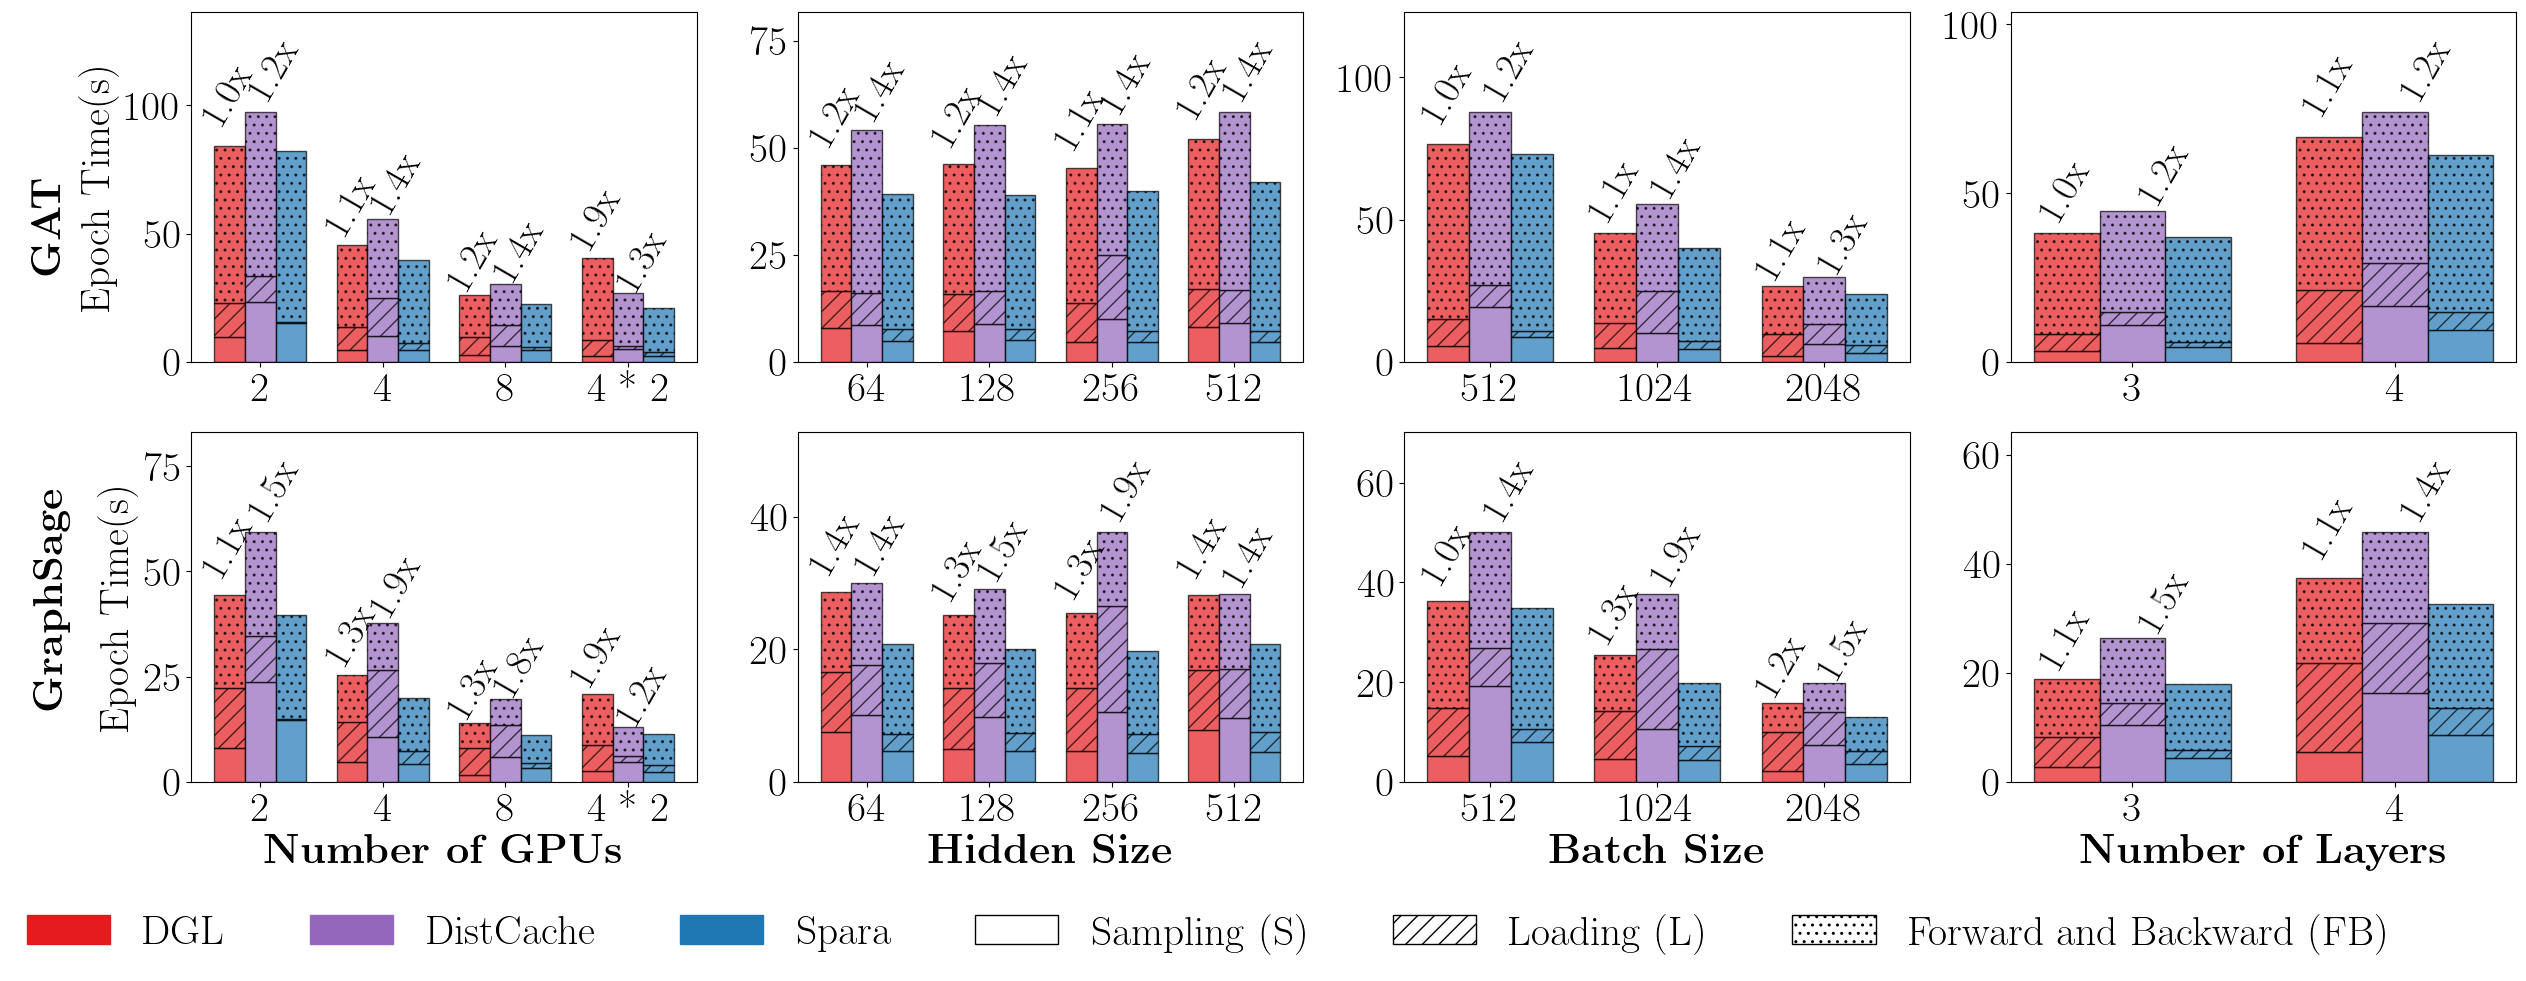

In [11]:
N = 2
import numpy as np
ind = np.arange(N) 
width = .2

datasets = { 'orkut':'OK', 'papers100M':'PA',}
datasets = {'papers100M':'PA'}
dgl_cache_pers = [1, 0, 0, 0,]
models = ['gat', 'sage']
model_label = {'gat':'GAT','sage':'GraphSage'}
model_cap = {'gat':'GAT','sage':'SAGE'}

fig, ax  = plt.subplots(2, 4, figsize=(30, 10))



for y_id in [0,1,2,3]:
    if y_id == 0:
        save_file = "scalability"
        abalation_h = 'world_size'
        x_label = r'\textbf{Number of GPUs}'
    if y_id == 1:
        save_file = "hidden"
        abalation_h = 'hid_size'
        x_label = r'\textbf{Hidden Size}'
    if y_id == 3:
        save_file = "depth"
        abalation_h = 'fanouts'
        x_label = r'\textbf{Number of Layers}'
    if y_id == 2:
        save_file = "batch_size"
        abalation_h = 'batch_size'
        x_label = r'\textbf{Batch Size}'
    
    df1 = pandas.read_csv(f'march_logs/p3.8xlarge/nvlink_{save_file}.csv')
    df2 = pandas.read_csv(f'march_logs/p3.8xlarge/nvlink_default.csv')
    if save_file != 'depth':
        df = pd.concat([df1,df2], axis = 0)
    else:
        df = df1
    abalation_v = list(df[abalation_h].unique())
    if save_file != "scalability":
        abalation_v.sort()
        if save_file == 'depth':
            abalation_v.sort(reverse = True)
        print(abalation_v)
    else:
        abalation_v = ["2", 4, "8", "4 * 2"]
    for dataset_id,dataset in enumerate(datasets):
        for x_id,model in enumerate(models):
            x_tick = []
            x_tick_val = []
            count = 0
            y_lim = 0
            for ab_id, abalation_val in enumerate(abalation_v):
                dgl_cache_per = dgl_cache_pers[dataset_id]
                dataset_df = df[(df['graph_name'] == dataset) & (df['model'] == model) \
                                    & (df[abalation_h] == abalation_val)]
#                 print(dataset_df['duration (s)'])
                dgl_row = dataset_df[dataset_df['system'].str.contains('dgl')]
                quiver_row = dataset_df[dataset_df['system'].str.contains('quiver')]
                groot_row = dataset_df[dataset_df['system'].str.contains('split')]
                dgl_time = plot_bar(ax[x_id][dataset_id * 2 + y_id], count, dgl_row, dgl_color, width)
                dgl_position = count
                if(dgl_time != None):
                    y_lim = max(dgl_time, y_lim)
                count = count + width 
                quiver_time =plot_bar(ax[x_id][dataset_id * 2 + y_id], count, quiver_row, quiver_color, width)
                y_lim = max(quiver_time, y_lim)
                quiver_position = count 
                count = count + width
                groot_time = plot_bar(ax[x_id][dataset_id * 2 + y_id], count, groot_row, groot_color, width)
                if(quiver_time != None):
                    y_lim = max(quiver_time, y_lim)
                if(quiver_time != None) and (dgl_time != None):
#                     print(groot_time, quiver_time, quiver_time/groot_time, abalation_val, model, abalation_val)
                    ax[x_id][dataset_id * 2 + y_id].text(quiver_position +.1,   quiver_time * 1.05 ,
                                                         '{:.1f}x'.format(quiver_time/groot_time), ha = 'center', \
                             rotation = 60,fontsize=font_size - 2)  
                    
                x_tick.append(count - width)
                if abalation_h == "fanouts":
                    dic = {"[10, 10]":2,"[10, 10, 10]":3,"[10, 10, 10, 10]":4}
                    x_tick_val.append(f"{dic[abalation_val]}")
                else:
                    if abalation_h == 'batch_size':
                        x_tick_val.append(abalation_val)
                    else:
                        x_tick_val.append(f"{abalation_val}")
                
                if(groot_time != None) and (dgl_time != None):
                    ax[x_id][dataset_id * 2 + y_id].text(dgl_position ,   dgl_time * 1.1 ,'{:.1f}x'.\
                             format(dgl_time/groot_time), ha = 'center', \
                         rotation = 60,fontsize=font_size - 2)
                    print(dgl_time, groot_time, dgl_time/groot_time, abalation_val, model, abalation_val)
                count = count + width * 2
            if x_id == 1:    
                ax[x_id][dataset_id * 2 +  y_id].set_xlabel(f"{x_label}")
            ax[x_id][dataset_id * 2 +  y_id].set_xticks(x_tick, x_tick_val)
            ax[x_id][dataset_id * 2 +  y_id].set_ylim([0,y_lim * 1.4])
            
            if model== "sage":
                ax[x_id][0].set_ylabel(r'\textbf{GraphSage} \\ \\ \\ Epoch Time(s)')
            else:
                ax[x_id][0].set_ylabel(r'\textbf{   GAT   } \\ \\ Epoch Time(s)')
            
patches = []
patches.append(mpatches.Patch(color=dgl_color, label='DGL'))
patches.append(mpatches.Patch(color=quiver_color, label='DistCache'))
patches.append(mpatches.Patch(color=groot_color, label='Spara'))
patches.append(mpatches.Patch( lw=1., edgecolor='black', fill=False,  label='Sampling (S)',color = None))
patches.append(mpatches.Patch(hatch = '//', lw=1., edgecolor='black', fill=False,  label='Loading (L)',color = None))               
patches.append( mpatches.Patch(hatch = '..', lw=1., edgecolor='black', fill=False,  label='Forward and Backward (FB)',color = None))          
plt.legend(handles=patches, ncol=len(patches), loc="lower left", frameon=False, bbox_to_anchor=  (-4, -.60))


plt.tight_layout(pad=2.0)

plt.savefig(f'pdfs/abalations.pdf',bbox_inches='tight')

In [ ]:
a = [1,2,3]
a.sort(reverse = True
      )